# Analyses Of Vertices

In [1]:
import pickle
import sys
sys.path.append('../')
import ScriptExtract
with open('notsem_table.pickle', 'rb') as f:
    table = pickle.load(f)
    f.close()

In [2]:
verb_dict = dict()
feature_dict_1 = dict()
feature_dict_2 = dict()
N = 0
N_verb = 0
for key in table:
    table_text = table[key]
    for item in table_text:
        actions = item['Actions']
        sentence = item['Sentence']
        for act in actions:
            b, e = act.inform['VERB'][0].begin, act.inform['VERB'][0].end
            N_verb += 1
            verb = sentence[b:e]
            if verb in verb_dict:
                verb_dict[verb] += 1
            else:
                verb_dict[verb] = 1
            for depend in act.inform:
                if not depend in ['punct', 'VERB']:
                    for w in act.inform[depend]:
                        N += 1
                        lemma = w[0].lemma
                        if lemma in feature_dict_1:
                            feature_dict_1[lemma] += 1
                        else:
                            feature_dict_1[lemma] = 1
                        if (depend, lemma) in feature_dict_2:
                            feature_dict_2[(depend, lemma)] += 1
                        else:
                            feature_dict_2[(depend, lemma)] = 1

In [3]:
print('Number of verbs {}'.format(N_verb))
print('Number of groups {}'.format(len(verb_dict)))
print('Share of unique words {}'.format(len([i for i in verb_dict if verb_dict[i] == 1])))

Number of verbs 1903
Number of groups 807
Share of unique words 504


<IPython.core.display.Javascript object>


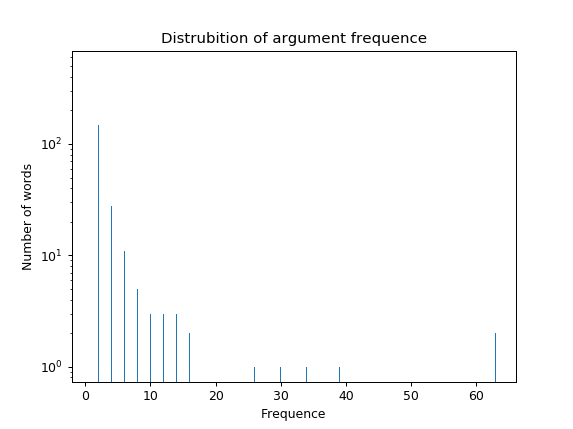

Text(0.5, 1.0, 'Distrubition of argument frequence')

In [6]:
x = [verb_dict[i] for i in verb_dict]

import matplotlib.pylab as plt
%matplotlib notebook

plt.plot()
n_bins = len(x)
plt.hist(x, bins=n_bins)
plt.yscale('log')
plt.ylabel('Number of words')
plt.xlabel('Frequence')
plt.title('Distrubition of argument frequence')

In [7]:
print('Number of arguments {}'.format(N))
print('Number of groups {}'.format(len(feature_dict_1)))
print('Share of unique arguments {}'.format(len([i for i in feature_dict_1 if feature_dict_1[i] == 1])))

Number of arguments 2637
Number of groups 997
Share of unique arguments 588


<IPython.core.display.Javascript object>


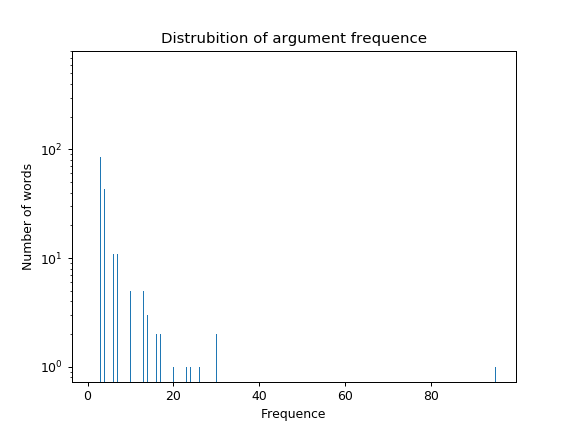

Text(0.5, 1.0, 'Distrubition of argument frequence')

In [8]:
x = [feature_dict_1[i] for i in feature_dict_1]

import matplotlib.pylab as plt
%matplotlib notebook

plt.plot()
n_bins = len(x)
plt.hist(x, bins=n_bins)
plt.yscale('log')
plt.ylabel('Number of words')
plt.xlabel('Frequence')
plt.title('Distrubition of argument frequence')

In [9]:
print('Number of arguments {}'.format(N))
print('Number of groups {}'.format(len(feature_dict_2)))
print('Share of unique arguments {}'.format(len([i for i in feature_dict_2 if feature_dict_2[i] == 1])))

Number of arguments 2637
Number of groups 1345
Share of unique arguments 928


<IPython.core.display.Javascript object>


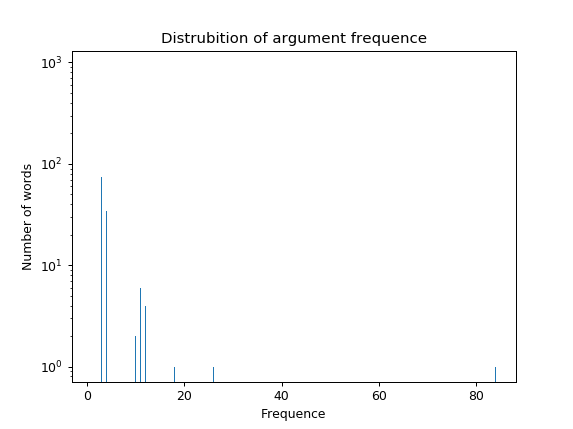

Text(0.5, 1.0, 'Distrubition of argument frequence')

In [10]:
x = [feature_dict_2[i] for i in feature_dict_2]

import matplotlib.pylab as plt
%matplotlib notebook

plt.plot()
n_bins = len(x)
plt.hist(x, bins=n_bins)
plt.yscale('log')
plt.ylabel('Number of words')
plt.xlabel('Frequence')
plt.title('Distrubition of argument frequence')